In [4]:
# Thompson Sampling for Slot Machines

# Importing the libraries
#(Harris et. al., 2020)
import numpy as np

In [5]:
# Setting conversion rates and the number of samples
conversionRates = [0.15, 0.04, 0.13, 0.11, 0.05]
N = 10000
d = len(conversionRates)

# Creating the dataset
X = np.zeros((N, d))
for i in range(N):
    for j in range(d):
        if np.random.rand() < conversionRates[j]:
            X[i][j] = 1


In [6]:
# Making arrays to count our losses and wins
#np.zeros will "return a new array of given shape and type, filled with zeros"
nPosReward = np.zeros(d)
nNegReward = np.zeros(d)

In [7]:
# Taking our best slot machine through beta distibution and updating its losses and wins
for i in range(N):
    selected = 0
    maxRandom = 0
    for j in range(d):
        randomBeta = np.random.beta(nPosReward[j] + 1, nNegReward[j] + 1)
        if randomBeta > maxRandom:
            maxRandom = randomBeta
            selected = j
    if X[i][selected] == 1:
        nPosReward[selected] += 1
    else:
        nNegReward[selected] += 1

In [8]:
# Showing which slot machine is considered the best
nSelected = nPosReward + nNegReward 
for i in range(d):
    print('Machine number ' + str(i + 1) + ' was selected ' + str(nSelected[i]) + ' times')
print('Conclusion: Best machine is machine number ' + str(np.argmax(nSelected) + 1))


Machine number 1 was selected 8277.0 times
Machine number 2 was selected 58.0 times
Machine number 3 was selected 1516.0 times
Machine number 4 was selected 107.0 times
Machine number 5 was selected 42.0 times
Conclusion: Best machine is machine number 1


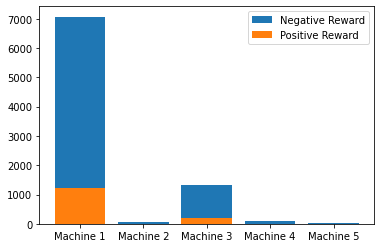

In [9]:
# create plot
# The number of times the slot machine number i returned a 1 reward up to round n
# The number of times the slot machine number i returned a 0 reward up to round n
#(Hunter, 2007)
import matplotlib.pyplot as plt

labels = ["Machine 1", "Machine 2", "Machine 3", "Machine 4", "Machine 5"]
fig, ax = plt.subplots()
ax.bar(labels, nNegReward, label="Negative Reward")
ax.bar(labels, nPosReward, label="Positive Reward")
ax.legend()
plt.show()

In [10]:
# Models comparison

import numpy as np
import pandas as pd

N = [200, 1000, 5000]
D = 20
convRanges = [(0., 0.1), (0., 0.3), (0., 0.5)]

In [11]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
results = list()
for n in N:
    for ranges in convRanges:
        results.append([])
        for d  in range(3, D + 1):
            p1 = 0
            p2 = 0

            for rounds in range(1000):
                
                conversionRates = list()
                for i in range(d):
                    conversionRates.append(np.random.uniform(low = ranges[0], high = ranges[1]))
                    
                X = np.zeros((n,d))
                for i in range(n):
                    for j in range(d):
                        if np.random.rand() < conversionRates[j]:
                            X[i][j] = 1
                
                nPosReward = np.zeros(d)
                nNegReward = np.zeros(d)
                
                for i in range(n):
                    selected = 0
                    maxRandom = 0
                    
                    for j in range(d):
                        randomBeta = np.random.beta(nPosReward[j] + 1, nNegReward[j] + 1)
                        if randomBeta > maxRandom:
                            maxRandom = randomBeta
                            selected = j
                        
                    if X[i][selected] == 1:
                        nPosReward[selected] += 1
                    else:
                        nNegReward[selected] += 1
                
                nSelected = nPosReward + nNegReward
                
                left = n - max(nSelected)
                
                countStandard = np.zeros(d)
                
                x = int(left / d)
                for i in range(x):
                    for j in range(d):
                        if X[i][j] == 1:
                            countStandard[j] += 1
                
                bestStandard = np.argmax(countStandard)
                bestReal = np.argmax(conversionRates)
                bestTS = np.argmax(nSelected)

                if bestTS == bestReal:
                    p1 += 1
                if bestStandard == bestReal:
                    p2 += 1
                
            print('N = ' + str(n) + ' d = ' + str(d) + ' range = ' + str(ranges) + ' | result Thompson Sampling = ' + str(p1) + ' result Standard solution = ' + str(p2))
            results.append([n, ranges, d, p1, p2])
                
df = pd.DataFrame(results)



N = 200 d = 3 range = (0.0, 0.1) | result Thompson Sampling = 620 result Standard solution = 559
N = 200 d = 4 range = (0.0, 0.1) | result Thompson Sampling = 530 result Standard solution = 484
N = 200 d = 5 range = (0.0, 0.1) | result Thompson Sampling = 479 result Standard solution = 425
N = 200 d = 6 range = (0.0, 0.1) | result Thompson Sampling = 442 result Standard solution = 381
N = 200 d = 7 range = (0.0, 0.1) | result Thompson Sampling = 360 result Standard solution = 324
N = 200 d = 8 range = (0.0, 0.1) | result Thompson Sampling = 322 result Standard solution = 286
N = 200 d = 9 range = (0.0, 0.1) | result Thompson Sampling = 329 result Standard solution = 289
N = 200 d = 10 range = (0.0, 0.1) | result Thompson Sampling = 247 result Standard solution = 252
N = 200 d = 11 range = (0.0, 0.1) | result Thompson Sampling = 257 result Standard solution = 226
N = 200 d = 12 range = (0.0, 0.1) | result Thompson Sampling = 230 result Standard solution = 194
N = 200 d = 13 range = (0.0

In [14]:
df.to_excel('/content/gdrive/MyDrive/results.xlsx', sheet_name = 'Result', index = False)

In [15]:
import pandas as pd
list_200 = df[df[0] == 200]
list_1000 = df[df[0] == 1000]
list_5000 = df[df[0] == 5000]

In [22]:
ranges = list(range(3,21))
list_200_01 = list_200[list_200[1] == (0.0, 0.1)]
list_200_03 = list_200[list_200[1] == (0.0, 0.3)]
list_200_05 = list_200[list_200[1] == (0.0, 0.5)]

pg_200_01 = ((list_200_01[3] - list_200_01[4]) / list_200_01[4]) * 100
pg_200_03 = ((list_200_03[3] - list_200_03[4]) / list_200_03[4]) * 100
pg_200_05 = ((list_200_05[3] - list_200_05[4]) / list_200_05[4]) * 100

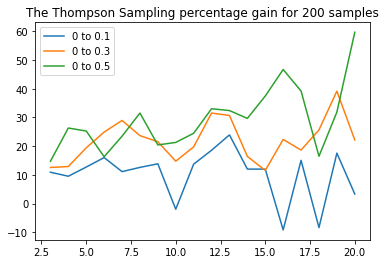

In [32]:

plt.plot(ranges, pg_200_01, label = "0 to 0.1")
plt.plot(ranges, pg_200_03, label = "0 to 0.3")
plt.plot(ranges, pg_200_05, label = "0 to 0.5") 
plt.legend()
plt.title("The Thompson Sampling percentage gain for 200 samples")
plt.show()

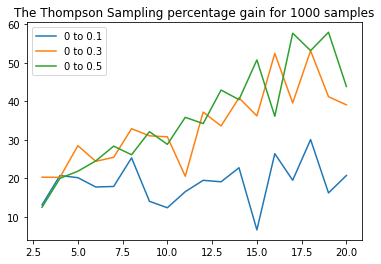

In [33]:
list_1000_01 = list_1000[list_1000[1] == (0.0, 0.1)]
list_1000_03 = list_1000[list_1000[1] == (0.0, 0.3)]
list_1000_05 = list_1000[list_1000[1] == (0.0, 0.5)]

pg_1000_01 = ((list_1000_01[3] - list_1000_01[4]) / list_1000_01[4]) * 100
pg_1000_03 = ((list_1000_03[3] - list_1000_03[4]) / list_1000_03[4]) * 100
pg_1000_05 = ((list_1000_05[3] - list_1000_05[4]) / list_1000_05[4]) * 100

plt.plot(ranges, pg_1000_01, label = "0 to 0.1")
plt.plot(ranges, pg_1000_03, label = "0 to 0.3")
plt.plot(ranges, pg_1000_05, label = "0 to 0.5") 
plt.legend()
plt.title("The Thompson Sampling percentage gain for 1000 samples")
plt.show()

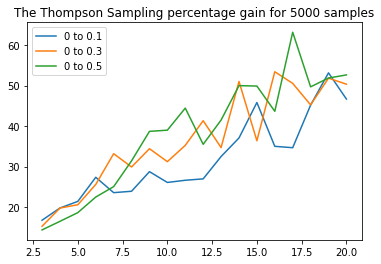

In [34]:
list_5000_01 = list_5000[list_5000[1] == (0.0, 0.1)]
list_5000_03 = list_5000[list_5000[1] == (0.0, 0.3)]
list_5000_05 = list_5000[list_5000[1] == (0.0, 0.5)]

pg_5000_01 = ((list_5000_01[3] - list_5000_01[4]) / list_5000_01[4]) * 100
pg_5000_03 = ((list_5000_03[3] - list_5000_03[4]) / list_5000_03[4]) * 100
pg_5000_05 = ((list_5000_05[3] - list_5000_05[4]) / list_5000_05[4]) * 100

plt.plot(ranges, pg_5000_01, label = "0 to 0.1")
plt.plot(ranges, pg_5000_03, label = "0 to 0.3")
plt.plot(ranges, pg_5000_05, label = "0 to 0.5") 
plt.legend()
plt.title("The Thompson Sampling percentage gain for 5000 samples")
plt.show()